In [1]:
import yfinance as yf

# Download stock data (e.g., Apple - AAPL)
ticker = "AAPL"
start_date = "2015-01-01"
end_date = "2024-12-31"

df = yf.download(ticker, start=start_date, end=end_date)
df = df[['Close']]  # Use only the closing price for prediction
df.head()


/tmp/ipython-input-1-3336996147.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


Price,Close
Ticker,AAPL
Date,
2015-01-02,24.288582
2015-01-05,23.604332
2015-01-06,23.606558
2015-01-07,23.937571
2015-01-08,24.857306


In [2]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Normalize closing price
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

# Create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i - seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

seq_length = 60
X, y = create_sequences(scaled_data, seq_length)

# Reshape input for LSTM [samples, time steps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)),
    Dropout(0.2),
    LSTM(units=50),
    Dropout(0.2),
    Dense(units=1)  # Predict closing price
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
model.fit(X, y, epochs=20, batch_size=32)


Epoch 1/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - loss: 0.0245
Epoch 2/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 0.0023
Epoch 3/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - loss: 0.0021
Epoch 4/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 0.0018
Epoch 5/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - loss: 0.0019
Epoch 6/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - loss: 0.0016
Epoch 7/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 0.0014
Epoch 8/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - loss: 0.0014
Epoch 9/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - loss: 0.0015
Epoch 10/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 0.0013
Epoch 11/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - loss: 0.0012
Epoch 12/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 0.0013
Epoch 13/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 0.0013
Epoch 14/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 7s 69ms/step - loss: 0.0011
Epoch 15/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - loss: 9.4838e-04


77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step


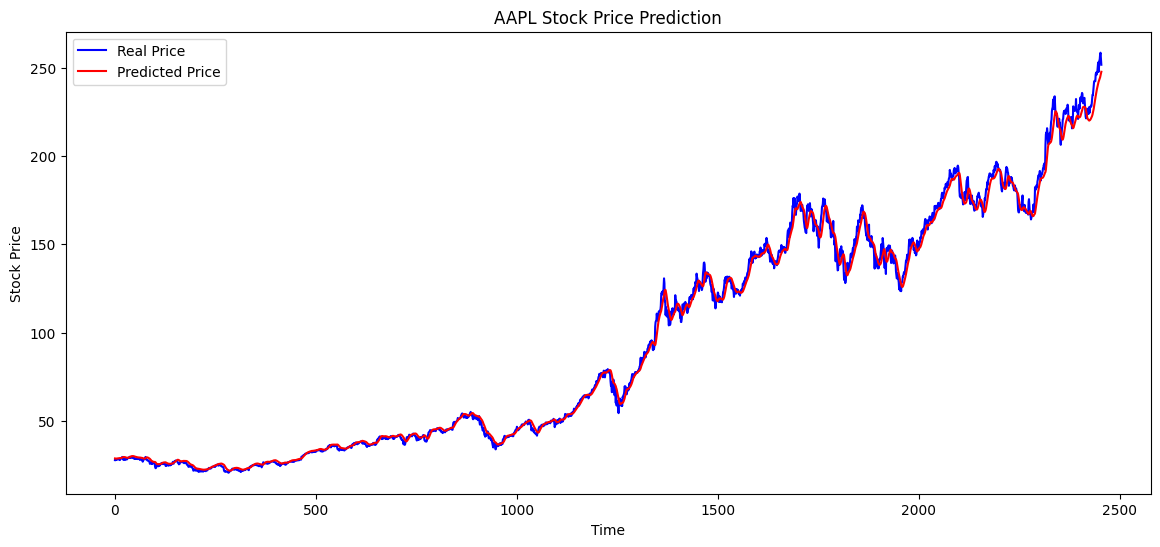

In [5]:
predicted = model.predict(X)
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y.reshape(-1, 1))

import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(real_prices, color='blue', label='Real Price')
plt.plot(predicted_prices, color='red', label='Predicted Price')
plt.title(f'{ticker} Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [6]:
from sklearn.metrics import mean_squared_error
import math

rmse = math.sqrt(mean_squared_error(real_prices, predicted_prices))
print(f"RMSE: {rmse}")


RMSE: 3.851863824356032
